In [1]:
import picamera2 as p2
import time
import matplotlib.pylab as plt


In [2]:
picam2 = p2.Picamera2()
video_config = picam2.create_video_configuration(main={"size": (160, 120)}, lores={"size": (160, 120)}, display="lores")
picam2.configure(video_config)
picam2.start()
time.sleep(1)

[2:59:12.159401666] [11427]  INFO Camera camera_manager.cpp:284 libcamera v0.1.0+118-563cd78e
[2:59:12.247848586] [11458]  WARN RPiSdn sdn.cpp:39 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[2:59:12.252460915] [11458]  INFO RPI vc4.cpp:444 Registered camera /base/soc/i2c0mux/i2c@1/ov5647@36 to Unicam device /dev/media3 and ISP device /dev/media0
[2:59:12.252521156] [11458]  INFO RPI pipeline_base.cpp:1142 Using configuration file '/usr/share/libcamera/pipeline/rpi/vc4/rpi_apps.yaml'
[2:59:12.255647474] [11427]  INFO Camera camera_manager.cpp:284 libcamera v0.1.0+118-563cd78e
[2:59:12.293029625] [11461]  WARN RPiSdn sdn.cpp:39 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[2:59:12.295241503] [11461]  INFO RPI vc4.cpp:444 Registered camera /base/soc/i2c0mux/i2c@1/ov5647@36 to Unicam device /dev/media3 and ISP device /dev/media0
[2:59:12.295295817] [11461]  INFO RPI pipeline_base.cpp:1142 Using configuration file '/usr/share/libcamera/

In [3]:
array = picam2.capture_array("main")
print(type(array),array.shape)

<class 'numpy.ndarray'> (120, 160, 4)


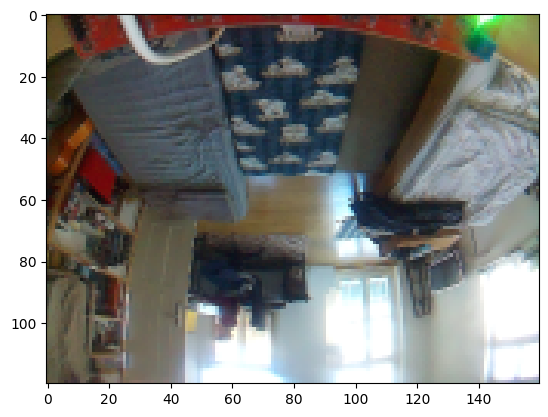

In [4]:
plt.imshow(array)

In [5]:
image = picam2.capture_image("main")
print(type(image))

<class 'PIL.Image.Image'>


In [6]:
picam2.close()